<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [ACTF1] - Activation functions
<!-- DESC --> Some activation functions, with their derivatives.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - View the main activation functions 

Les fonctions d'activation dans Keras :  
https://www.tensorflow.org/api_docs/python/tf/keras/activations

## What we're going to do :

 - Juste visualiser les principales fonctions d'activation


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import math
from math import erfc, sqrt, exp
from math import pi as PI
from math import e as E
import sys

sys.path.append('..')
import fidle.pwk as ooo

ooo.init()

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.17
Notebook id          : Unknown
Run time             : Monday 01 March 2021, 21:45:24
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


'/gpfswork/rech/mlh/uja62cb/datasets'

In [2]:
SELU_A = -sqrt(2/PI)/(erfc(1/sqrt(2))*exp(1/2)-1)
SELU_L = (1-erfc(1/sqrt(2))*sqrt(E))*sqrt(2*PI) / (2*erfc(sqrt(2))*E*E+PI*erfc(1/sqrt(2))**2*E-2*(2+PI)*erfc(1/sqrt(2))*sqrt(E)+PI+2)**0.5


def heaviside(z):
    return np.where(z<0,0,1)

def sign(z):
    return np.where(z<0,-1,1)
#    return np.sign(z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z,a=0.05):
    return np.maximum(a*z, z)

def elu(z,a=1):
    #y=z.copy()
    y=a*(np.exp(z)-1)
    y[z>0]=z[z>0]
    return y

def selu(z):
    return SELU_L*elu(z,a=SELU_A)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

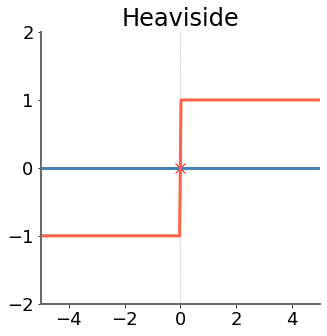

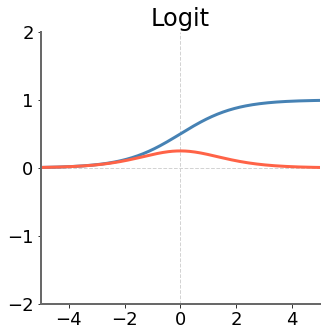

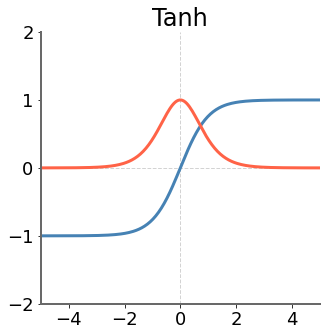

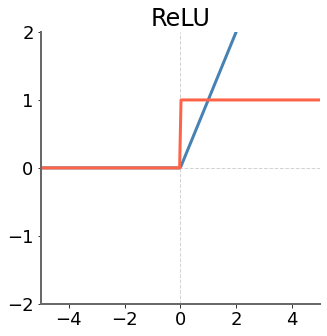

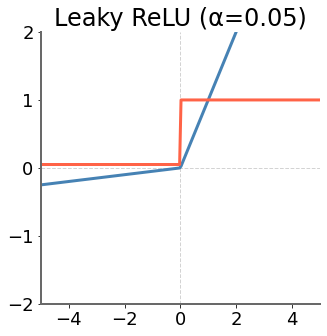

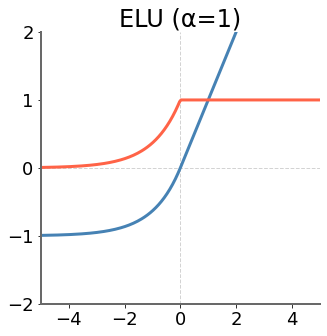

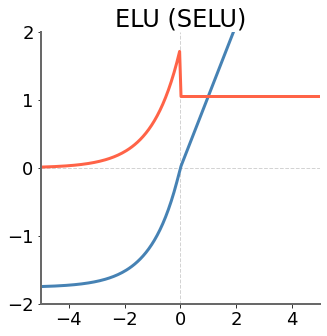

In [3]:
pw=5
ph=5

z = np.linspace(-5, 5, 200)


# ------ Heaviside
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(0, 0, "rx", markersize=10)
ax.plot(z, sign(z),                linewidth=2, linestyle='-',  color='steelblue', label="Heaviside")
ax.plot(z, derivative(np.sign, z),   label="dHeaviside/dx")
ax.plot(z, sign(z),                  label="Heaviside")
ax.set_title("Heaviside")
ooo.save_fig('Heaviside')
plt.show()


# ----- Logit/Sigmoid
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, sigmoid(z),             label="Sigmoid")
ax.plot(z, derivative(sigmoid, z), label="dSigmoid/dx")
ax.set_title("Logit")
ooo.save_fig('Logit')
plt.show()

# ----- Tanh
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, tanh(z),             label="Tanh")
ax.plot(z, derivative(tanh, z), label="dTanh/dx")
ax.set_title("Tanh")
ooo.save_fig('Tanh')
plt.show()

# ----- Relu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, relu(z),             label="ReLU")
ax.plot(z, derivative(relu, z), label="dReLU/dx")
ax.set_title("ReLU")
ooo.save_fig('ReLU')
plt.show()

# ----- Leaky Relu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, leaky_relu(z),              label="Leaky ReLU")
ax.plot(z, derivative( leaky_relu, z), label="dLeakyReLU/dx")
ax.set_title("Leaky ReLU (α=0.05)")
ooo.save_fig('LeakyReLU')
plt.show()

# ----- Elu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, elu(z),              label="ReLU")
ax.plot(z, derivative( elu, z), label="dExpReLU/dx")
ax.set_title("ELU (α=1)")
ooo.save_fig('ELU')
plt.show()

# ----- Selu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, selu(z),              label="SeLU")
ax.plot(z, derivative( selu, z), label="dSeLU/dx")
ax.set_title("ELU (SELU)")
ooo.save_fig('SeLU')
plt.show()



---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>